In [38]:
# Student ID: 1010752829
# Student name: Nargiz Guliyeva
# Instructor: Dr. Shion Gupa
# Course code:INF 2178
# Course name: Experimental Design for Data Science
# Program: MI
# Faculty of Information
# University of Toronto

# Technical Assignment 4
# Date submitted: 04.05.2024

In [39]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.power as smp

%pip install pingouin
import pingouin as pg

from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro, levene

import statsmodels.stats.power as smp
from statsmodels.stats.power import TTestIndPower

In [40]:
# Import the excel file in the coLab "Files" section and then assign it to a new variable "df" and print the heads
df=pd.read_csv("INF2178_A4_data.csv")
df.head(10)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
6,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
7,8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
8,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
9,13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380


In [41]:
# Explore the data with the various methods through the function 'explore data'
def explore_data(df):
    df.shape # Display shape of the DataFrame
    print(f"Data Shape: {df.shape}\n")

    # Display information about the DataFrame
    print("Data Info:")
    df.info()
    print("\n")

    # Display the number of duplicated rows
    duplicated_count = df.duplicated().sum()
    print(f"Number of Duplicated Rows: {duplicated_count}\n")

explore_data(df)

Data Shape: (294, 16)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


Number of Duplicated Rows: 0



In [ ]:
# Describe the dataframe
df.describe(include="all")

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294,294,294,294.000000,294.000000,294,294,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
unique,NaN,150,294,3,NaN,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,OAS2_0001,OAS2_0001_MR1,Nondemented,NaN,NaN,F,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,1,142,NaN,NaN,173,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,190.421769,NaN,NaN,NaN,1.489796,349.785714,NaN,NaN,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,106.686740,NaN,NaN,NaN,0.500748,400.741520,NaN,NaN,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,99.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,195.500000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,282.750000,NaN,NaN,NaN,2.000000,671.500000,NaN,NaN,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750


In [ ]:
# Explore the missing data
df.isna().sum()

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
# Keep the relevant columns
columns = ["Subject ID", "Group", "Visit", "Age", "MMSE", "eTIV", "nWBV", "ASF"]
data = df[columns].copy()

In [ ]:
# Ensure that the data types are correct
data["Visit"] = data["Visit"].astype(str)
data["eTIV"] = data["eTIV"].astype(float)
data["MMSE"] = data["MMSE"].astype(float)

In [ ]:
# Create a new categorical variable on the age groups
age_group_mapping = {'60-69': 1, '70-79': 2, '80-89': 3, '90-99': 4}

data['Agegroup'] = data['Age'].apply(lambda x: age_group_mapping['60-69'] if 60 <= x < 70 else
                                    age_group_mapping['70-79'] if 70 <= x < 80 else
                                    age_group_mapping['80-89'] if 80 <= x < 90 else
                                    age_group_mapping['90-99'] if 90 <= x < 100 else None)
data["Agegroup"] = data["Agegroup"].astype(str)

In [ ]:
# Treat the missing values
data.dropna(subset=['MMSE'], inplace=True)

In [ ]:
# Create variable by extracting 'Subject Id'
data['Subject'] = data['Subject ID'].str.extract('(\d+)$').astype(int)

In [ ]:
# Create a new dataframe and keep only relevant variables
data = data[["Subject", "Group", "Visit","MMSE", "Age", "Agegroup", "eTIV", "nWBV", "ASF"]]
data.head(10)

,Subject,Group,Visit,MMSE,Age,Agegroup,eTIV,nWBV,ASF
0,1,Nondemented,1,27.0,87,3,1987.0,0.696,0.883
1,1,Nondemented,2,30.0,88,3,2004.0,0.681,0.876
2,2,Demented,1,23.0,75,2,1678.0,0.736,1.046
3,2,Demented,2,28.0,76,2,1738.0,0.713,1.010
4,4,Nondemented,1,28.0,88,3,1215.0,0.710,1.444
5,4,Nondemented,2,27.0,90,4,1200.0,0.718,1.462
6,5,Nondemented,1,28.0,80,3,1689.0,0.712,1.039
7,5,Nondemented,2,29.0,83,3,1701.0,0.711,1.032
8,7,Demented,1,28.0,71,2,1357.0,0.748,1.293
9,8,Nondemented,1,30.0,93,4,1272.0,0.698,1.380


### **Explarotory Data Analysis**

<ipython-input-15-26a256a1726b>:9: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='Group', y='MMSE', hue='Visit', dodge=True,


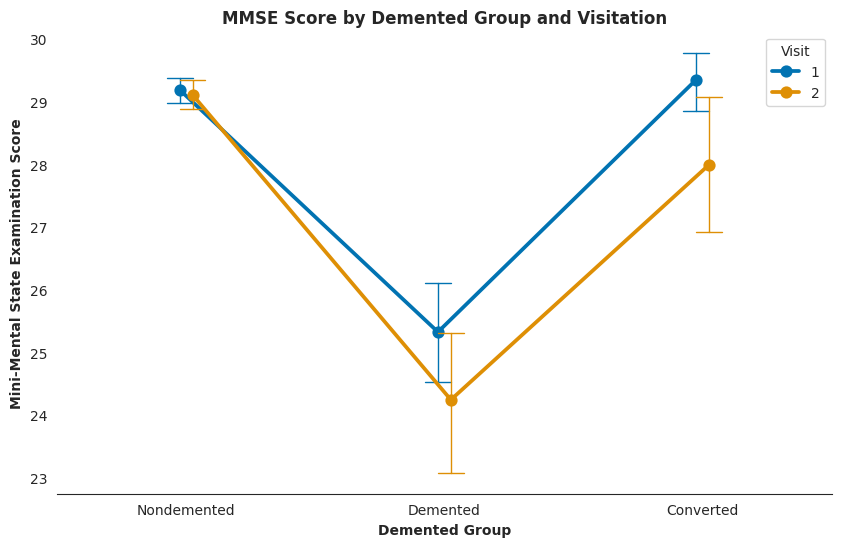

In [ ]:
# Vizualize the relationship between Mini-Mental State Examination score, which is a measure of cognitive function,
# group of nondemented, demented, converted with points grouped by visitation

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("white")
plt.gca().set_facecolor('white')

# Create the point plot
sns.pointplot(data=data, x='Group', y='MMSE', hue='Visit', dodge=True,
	      capsize=.1, errwidth=1, palette='colorblind')

# Set the title of the plot, x and y axis
plt.title('MMSE Score by Demented Group and Visitation', fontweight = 'bold')
plt.xlabel('Demented Groups', fontweight = 'bold')
plt.ylabel('Mini-Mental State Examination Score', fontweight = 'bold')

# Remove spines and y-axis grid
sns.despine(left=True)

# Display
plt.show()

<ipython-input-16-13283f2f6994>:9: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='Agegroup', y='eTIV', hue='Visit', dodge=True,


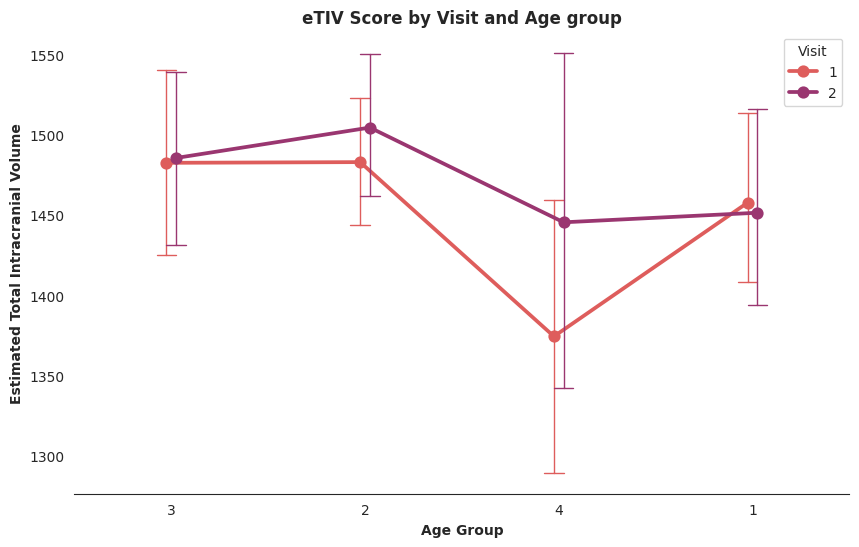

In [ ]:
# Vizualize the relationship between estimated total intracranial volume
# and  visit type grouped by age

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("white")

# Create the plot
sns.pointplot(data=data, x='Agegroup', y='eTIV', hue='Visit', dodge=True,
	      capsize=.1, errwidth=1, palette='flare')

# Set the title of the plot, x and y axis
plt.title('eTIV Score by Visit and Age group', fontweight = 'bold')
plt.xlabel('Age Group', fontweight = 'bold')
plt.ylabel('Estimated Total Intracranial Volume', fontweight = 'bold')

# Remove the surrounding lines (spines) and y-axis grid
sns.despine(left=True)

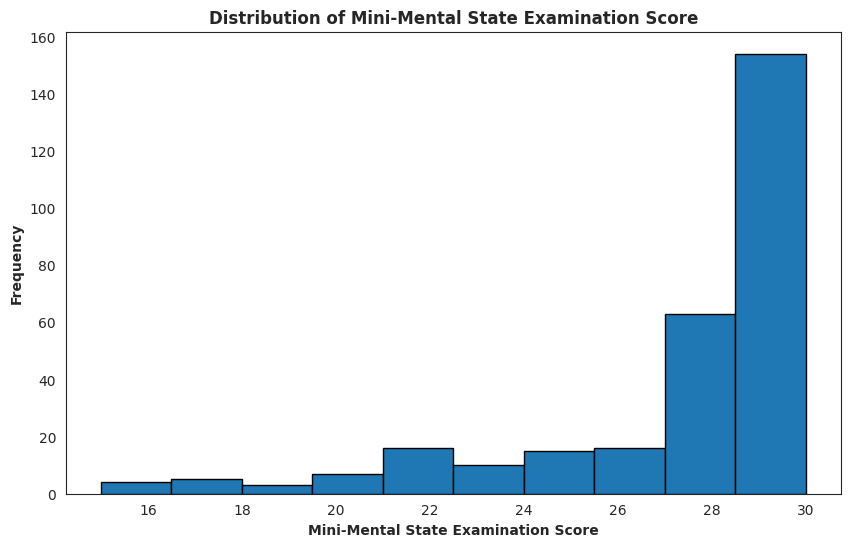

In [ ]:
# Vizualize the distribution for Mini-Mental State Examination Score

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the plot
plt.hist(data['MMSE'], bins=10, edgecolor='black')

# Set the labels and a title
plt.xlabel('Mini-Mental State Examination Score', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Mini-Mental State Examination Score', fontweight='bold')

# Display
plt.show()

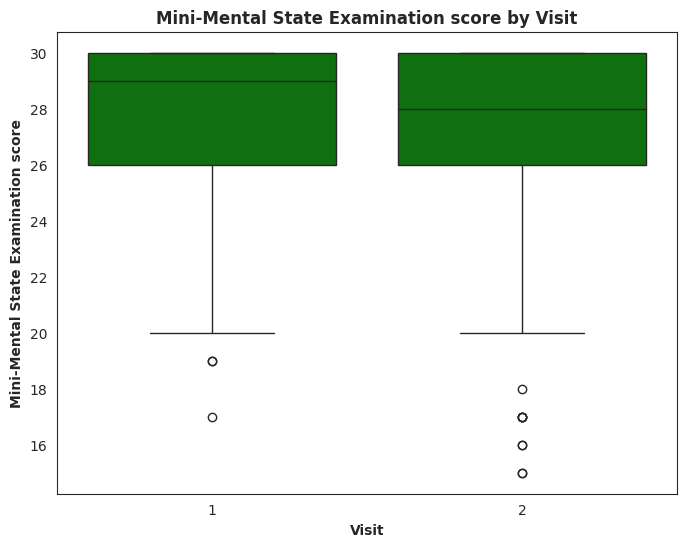

In [ ]:
# Vizualize Mini-Mental State Examination score by visit

# Set the size
plt.figure(figsize=(8, 6))

# Create a boxplot
sns.boxplot(x='Visit', y='MMSE', data=data, color='green')

# Set label and title
plt.xlabel('Visit',fontweight = 'bold')
plt.ylabel('Mini-Mental State Examination score',fontweight = 'bold')
plt.title('Mini-Mental State Examination score by Visit', fontweight = 'bold')

# Display
plt.show()

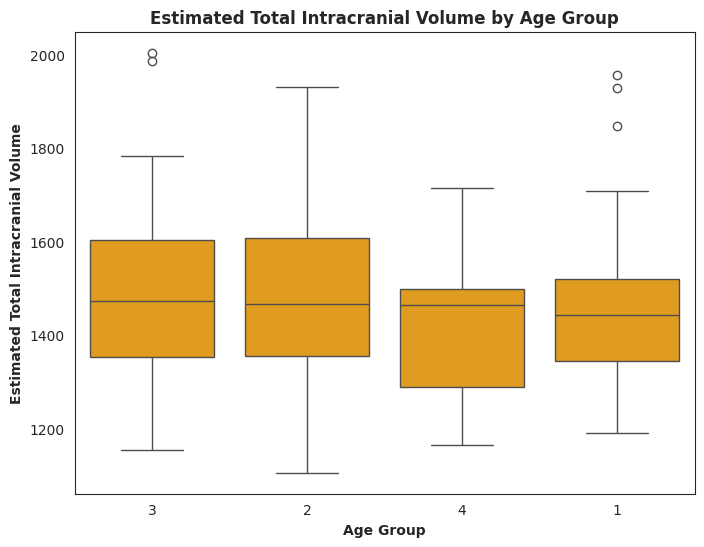

In [ ]:
# Vizualize estimated total intracranial volume by age group

# Set figure size
plt.figure(figsize=(8, 6))

# Create a boxplot
sns.boxplot(x='Agegroup', y='eTIV', data=data, color='orange')

# Set label and title
plt.xlabel('Age Group',fontweight = 'bold')
plt.ylabel('Estimated Total Intracranial Volume',fontweight = 'bold')
plt.title('Estimated Total Intracranial Volume by Age Group', fontweight = 'bold')

# Display
plt.show()

# **Model 1**

**Research question:** What is the effect of cognitive status and initial or subsequent visist on Mini-Mental State Examination (MMSE) scores among individuals aged 60 and above?


**H0:** There is no significant interaction effect between cognitive status and visit on Mini-Mental State Examination (MMSE) scores.
**H1:** There is a significant interaction effect between cognitive status and visit on MMSE scores.

**H0:** There are no significant differences in MMSE scores among individuals with different cognitive statuses.
**H1:** There are significant differences in MMSE scores among individuals with different cognitive statuses.

**H0:** There are no significant differences in MMSE scores between initial and subsequent visit, regardless of cognitive status.
**H1:** There are significant differences in MMSE scores between initial and subsequent visit, regardless of cognitive status.


In [ ]:
# Group the date by selected variables and calculate MMSE means and std
data.groupby(['Group', 'Visit'])['MMSE'].agg(['mean', 'std']).round(2)

mean   std
Group       Visit             
Converted   1      29.36  0.93
            2      28.00  2.09
Demented    1      25.33  3.32
            2      24.25  4.40
Nondemented 1      29.19  0.85
            2      29.11  0.96

In [ ]:
# Compute the two-way mixed-design ANOVA
pg.mixed_anova(data=data, dv="MMSE", between="Group", within="Visit", subject="Subject")

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,1328.421218,2,140,664.210609,56.212233,1.201604e-18,0.445379,NaN
1,Visit,22.377622,1,140,22.377622,8.859368,3.436529e-03,0.059515,1.0
2,Interaction,17.000403,2,140,8.500201,3.365255,3.737081e-02,0.045870,NaN


### **Model 1: Assumption Check**

In [ ]:
# Check assumption 1 on sphericity
pg.sphericity(data=data, dv="MMSE", within="Visit", subject="Subject")[-1]

1.0

In [ ]:
# Check assumption 2 on normality
pg.normality(data, dv="MMSE", group = "Group")

,W,pval,normal
Group,,,
Nondemented,0.809528,2.635762e-12,False
Demented,0.929083,5.677786e-06,False
Converted,0.770938,5.867723e-05,False


In [ ]:
# Check assumption 3 on homogeneity

print(pg.homoscedasticity(data[data['Visit'] == "1"], dv="MMSE", group="Group"))
print(pg.homoscedasticity(data[data['Visit'] == "2"], dv="MMSE", group="Group"))

               W          pval  equal_var
levene  36.89391  1.036701e-13      False
               W          pval  equal_var
levene  33.69637  1.130873e-12      False


# **Model 2**

**Research question:** What is the impact of age group and initial or subsequent visit  on estimated Total Intracranial Volume (eTIV) among individuals over 60?

**H0:**There is no significant interaction effect between age group and visit on eTIV.
**H1:** There is a significant interaction effect between age group and visit on eTIV.

**H0:**There are no significant differences in eTIV among individuals belonging to different age groups.
**H1:**There are significant differences in eTIV among individuals belonging to different age groups.

**H0:**There are no significant differences in eTIV between initial and subsequent visits, regardless of age group.
**H1:** There are significant differences in eTIV between initial and subsequent visits, regardless of age group.


In [ ]:
# Group the date by selected variables and calculate eTIV means and std
data.groupby(['Agegroup', 'Visit'])['eTIV'].agg(['mean', 'std']).round(2)

mean     std
Agegroup Visit                 
1        1      1457.91  155.20
         2      1451.61  154.59
2        1      1483.17  177.54
         2      1504.72  186.66
3        1      1482.73  190.95
         2      1485.76  174.12
4        1      1374.50   99.29
         2      1445.64  189.59

In [ ]:
# Compute the two-way mixed-design ANOVA
pg.mixed_anova(data=data, dv="eTIV", between="Agegroup", within="Visit", subject="Subject")

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Agegroup,160469.899747,3,109,53489.966582,0.824793,0.482953,0.022197,NaN
1,Visit,1875.225664,1,109,1875.225664,4.558583,0.034994,0.040143,1.0
2,Interaction,517.864438,3,109,172.621479,0.419634,0.739272,0.011418,NaN


### **Model 2: Assumption Check**

In [ ]:
# Check assumption 1 on sphericity
pg.sphericity(data=data, dv="eTIV", within="Visit", subject="Subject")[-1]

1.0

In [ ]:
# Check assumption 2 on normality
pg.normality(data, dv="eTIV", group = "Agegroup")

,W,pval,normal
Agegroup,,,
3,0.969872,0.041868,False
2,0.973761,0.010350,False
4,0.943061,0.422421,True
1,0.896050,0.000140,False


In [ ]:
# Check assumption 3 on homogeneity

print(pg.homoscedasticity(data[data['Visit'] == "1"], dv="eTIV", group="Agegroup"))
print(pg.homoscedasticity(data[data['Visit'] == "2"], dv="eTIV", group="Agegroup"))

               W     pval  equal_var
levene  1.102045  0.35038       True
               W      pval  equal_var
levene  0.530752  0.661914       True


# **Sample size**

In [ ]:
# Perform power analysis
power_analysis = smp.TTestIndPower()

# Identify sample size
sample_size = power_analysis.solve_power(effect_size=0.7, power=0.91, alpha=0.05)

print("Sample Size:", round(sample_size, 0))


Sample Size: 45.0


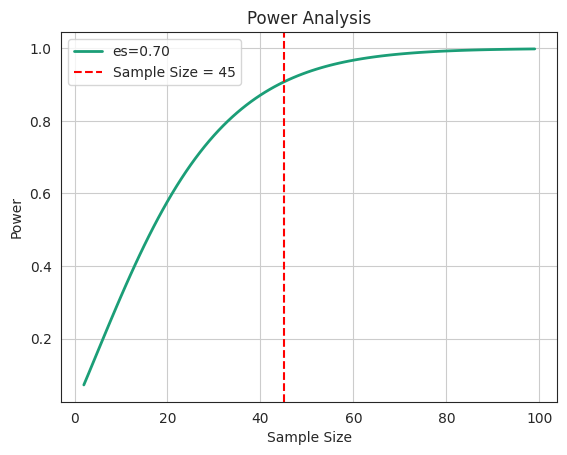

In [ ]:
# Plot power analysis
fig, ax = plt.subplots()
power_analysis.plot_power(dep_var='nobs', nobs=np.arange(2, 100), effect_size=[0.7], alpha=0.05, ax=ax)
ax.set_title('Power Analysis')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Power')
ax.grid(True)

# Add the vertical line at sample size 45
ax.axvline(x=45, color='r', linestyle='--', label='Sample Size = 45')
ax.legend()

# Display
plt.show()